<a href="https://colab.research.google.com/github/Papareddy-saketh/DL/blob/master/The_Perceptron_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CSCE 5218 / CSCE 4930 Deep Learning**

# **The Perceptron** (20 pt)


In [2]:
# Get the datasets
!!/usr/bin/curl --output test.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/test_small.txt
!!/usr/bin/curl --output train.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/train.txt


['  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current',
 '                                 Dload  Upload   Total   Spent    Left  Speed',
 '',
 '  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0',
 '100 11645  100 11645    0     0   190k      0 --:--:-- --:--:-- --:--:--  192k']

In [3]:
# Take a peek at the datasets
!head train.dat
!head test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
X1	X2	X3
1	1	1	1
0	0	1	1
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
1	1	1	1


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this.

In [4]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(array1, array2):
    #TODO: Return dot product of array 1 and array 2
    return sum(x*y for x,y in zip(array1,array2))


def sigmoid(x):
    #TODO: Return outpout of sigmoid function on x
    return 1/(1+math.exp(-x))

# The output of the model, which for the perceptron is
# the sigmoid function applied to the dot product of
# the instance and the weights
def output(weight, instance):
    #TODO: return the output of the model
    return sigmoid(dot_product(weight,instance))

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    #TODO: return the prediction of the model
    return 1 if output(weights,instance) >=0.5 else 0


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate)
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    #TODO: name this step
    # Intializing weights to zero
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            #TODO: name these steps
            # Compute the dot product of weights and input features
            in_value = dot_product(weights, instance)
            output = sigmoid(in_value)
            error = instance[-1] - output
            #TODO: name these steps
            # Updating weights using gradient descent
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]

    return weights

## Run it

In [5]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)

While training we use the sigmoid function to compute the output because the sigmoid function returns a continuous value in between 0 and 1 where as the predict function returns a binary output i.e, either 0 or 1 which is not suitable for the training . the continuous values are important for calculating the error and updating the weights using the gradient descent function. So we use sigmoid function rather than predict function for more smoother and precise weight adjustments during training.

### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above)








2.1 Code and Output

In [6]:

instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100]
num_epochs = [5, 10, 20, 50, 100]
lr_array = [0.005, 0.01, 0.05]

for lr in lr_array:
    for tr_size in tr_percent:
        for epochs in num_epochs:
            size = round(len(instances_tr) * tr_size / 100)
            pre_instances = instances_tr[:size]
            weights = train_perceptron(pre_instances, lr, epochs)
            accuracy = get_accuracy(weights, instances_te)

            print(f"#tr: {len(pre_instances):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
                  f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr:  20, epochs:  50, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr:  20, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 85.7
#tr:  40, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr:  40, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr:  40, epochs:  20, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr:  40, epochs:  50, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr:  40, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 100, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 100, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 100, epochs:  20, learn

2.2 Code and Output with different parameters

In [7]:

instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [10, 20, 30, 40, 50]
num_epochs = [10, 30, 50, 100,200]
lr_array = [0.003, 0.01, 0.03]

for lr in lr_array:
    for tr_size in tr_percent:
        for epochs in num_epochs:
            size = round(len(instances_tr) * tr_size / 100)
            pre_instances = instances_tr[:size]
            weights = train_perceptron(pre_instances, lr, epochs)
            accuracy = get_accuracy(weights, instances_te)

            print(f"#tr: {len(pre_instances):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
                  f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr:  40, epochs:  10, learning rate: 0.003; Accuracy (test, 14 instances): 71.4
#tr:  40, epochs:  30, learning rate: 0.003; Accuracy (test, 14 instances): 71.4
#tr:  40, epochs:  50, learning rate: 0.003; Accuracy (test, 14 instances): 71.4
#tr:  40, epochs: 100, learning rate: 0.003; Accuracy (test, 14 instances): 71.4
#tr:  40, epochs: 200, learning rate: 0.003; Accuracy (test, 14 instances): 71.4
#tr:  80, epochs:  10, learning rate: 0.003; Accuracy (test, 14 instances): 71.4
#tr:  80, epochs:  30, learning rate: 0.003; Accuracy (test, 14 instances): 71.4
#tr:  80, epochs:  50, learning rate: 0.003; Accuracy (test, 14 instances): 71.4
#tr:  80, epochs: 100, learning rate: 0.003; Accuracy (test, 14 instances): 71.4
#tr:  80, epochs: 200, learning rate: 0.003; Accuracy (test, 14 instances): 71.4
#tr: 120, epochs:  10, learning rate: 0.003; Accuracy (test, 14 instances): 71.4
#tr: 120, epochs:  30, learning rate: 0.003; Accuracy (test, 14 instances): 71.4
#tr: 120, epochs:  50, learn

In [8]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

for lr in lr_array:
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
    print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 85.7
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 100, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 200, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 85.7
#tr: 300, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 85.7
#tr: 400, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 20, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 42.9
#tr: 40, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 85.7
#tr: 100, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 28.6
#tr: 200, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 85.7
#tr: 300, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 85.7
#tr: 400, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 71.4
#tr: 20, epochs: 100, learning r

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)

A. It is not necessary to train the entire dataset to achieve the highest accuracy . Most of the time using a smaller training samples can help us achieve best results .Its happens becuase training too much of data leads to overfitting where the model performs well on the training data but performs poorly on the test dataset.But categorizing how much train data and test data needed depends on the dataset and model's complexity. Smaller datasets generalizes better as they capture more underlying patterns without overfitting.
So, we can say that all the training dataset is not needed for training and how much required completely depends on the requirement and the model.


B.Despite using more training data the second run achieves worse accuracy because the second run has smaller learning rate of 0.005 compared to the first run learning rate of 0.050.A smaller learning rate causes the model to rum slowly resulting in suboptimal weights after some number of epochs.Overfitting can also be a cause because the model learns too much of the training data and memorizes it rather than generalizing the test data.


C.Yes it is possible to achieve higher accuracy above 80 by tuning the hyperparametrs and changing learning rates and also diversifying the training data helps in higher accuracy.


D. No its not always worth training for more epochs while keeping all other hypermaters fixed because changes in epochs can improve the accuracy upto a certain point but it can also lead to overfitting of the model.Also training for more epochs takes lot of computational power and consumes a lot of time which can be said as computationally expensive. so its not beneficial for increase in epochs.






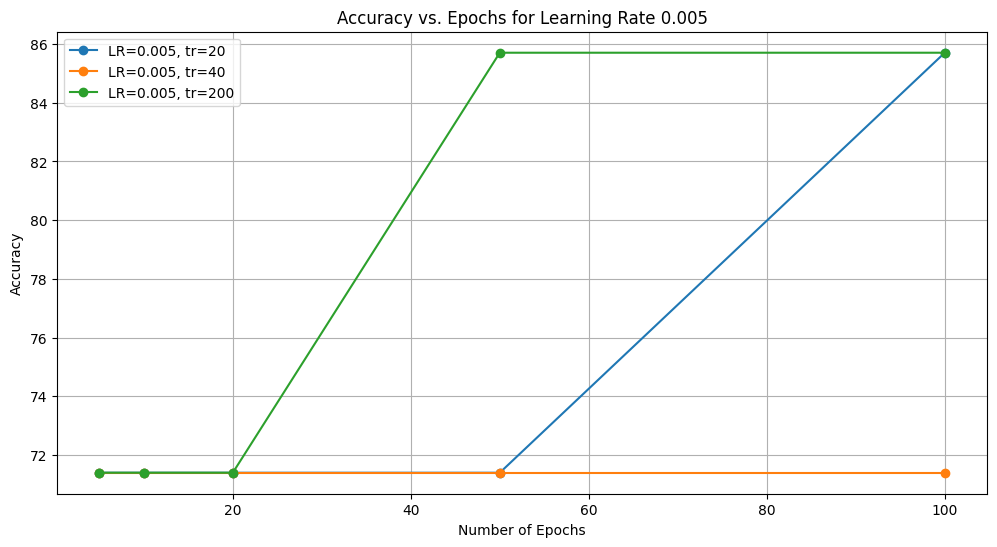

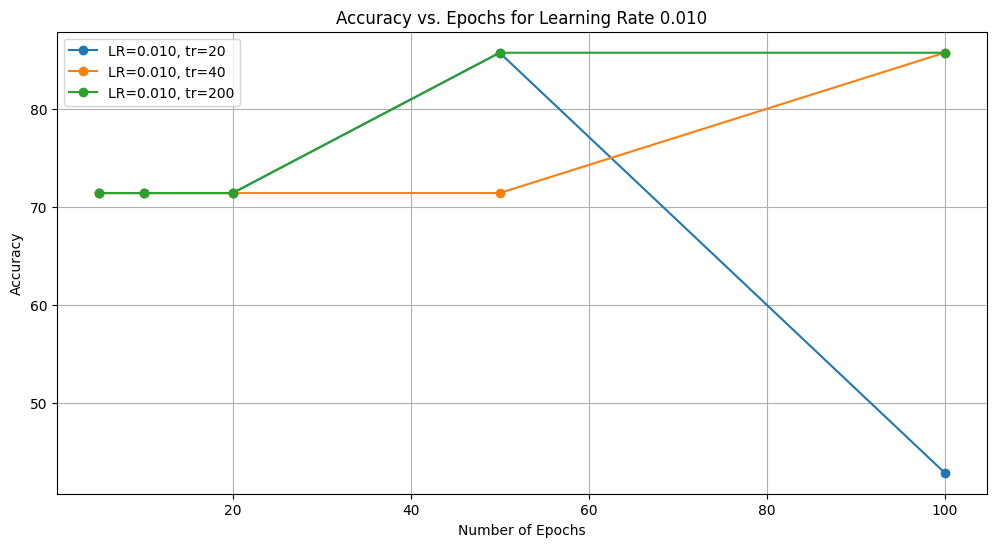

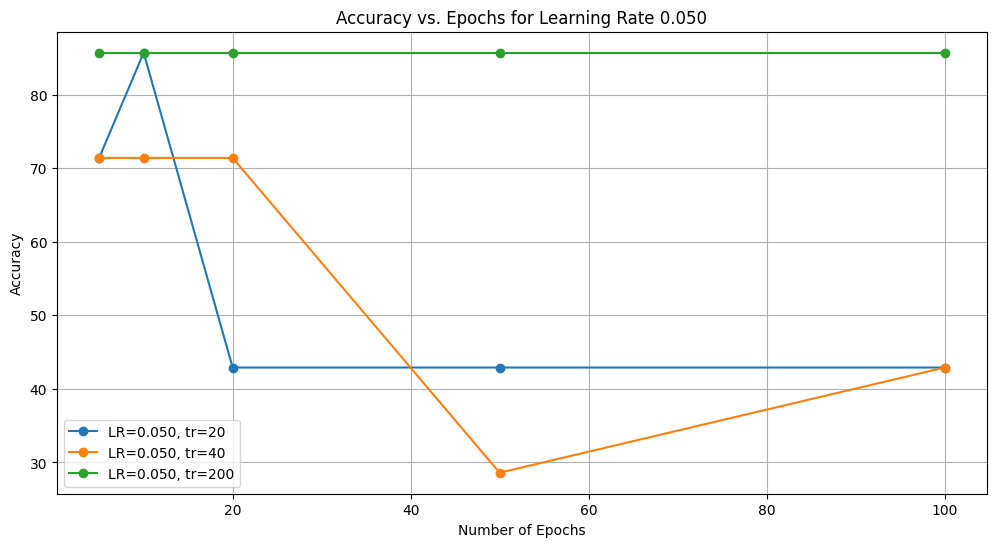

In [9]:
import matplotlib.pyplot as plt

# Data for learning rate 0.005
epochs_lr_005 = [5, 10, 20, 50, 100]
accuracy_lr_005_20 = [71.4, 71.4, 71.4, 71.4, 85.7]
accuracy_lr_005_40 = [71.4, 71.4, 71.4, 71.4, 71.4]
accuracy_lr_005_200 = [71.4, 71.4, 71.4, 85.7, 85.7]

# Data for learning rate 0.010
accuracy_lr_010_20 = [71.4, 71.4, 71.4, 85.7, 42.9]
accuracy_lr_010_40 = [71.4, 71.4, 71.4, 71.4, 85.7]
accuracy_lr_010_200 = [71.4, 71.4, 71.4, 85.7, 85.7]

# Data for learning rate 0.050
accuracy_lr_050_20 = [71.4, 85.7, 42.9, 42.9, 42.9]
accuracy_lr_050_40 = [71.4, 71.4, 71.4, 28.6, 42.9]
accuracy_lr_050_200 = [85.7, 85.7, 85.7, 85.7, 85.7]

# Plot for learning rate 0.005
plt.figure(figsize=(12, 6))
plt.plot(epochs_lr_005, accuracy_lr_005_20, marker='o', label='LR=0.005, tr=20')
plt.plot(epochs_lr_005, accuracy_lr_005_40, marker='o', label='LR=0.005, tr=40')
plt.plot(epochs_lr_005, accuracy_lr_005_200, marker='o', label='LR=0.005, tr=200')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs for Learning Rate 0.005')
plt.legend()
plt.grid(True)
plt.show()

# Plot for learning rate 0.010
plt.figure(figsize=(12, 6))
plt.plot(epochs_lr_005, accuracy_lr_010_20, marker='o', label='LR=0.010, tr=20')
plt.plot(epochs_lr_005, accuracy_lr_010_40, marker='o', label='LR=0.010, tr=40')
plt.plot(epochs_lr_005, accuracy_lr_010_200, marker='o', label='LR=0.010, tr=200')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs for Learning Rate 0.010')
plt.legend()
plt.grid(True)
plt.show()

# Plot for learning rate 0.050
plt.figure(figsize=(12, 6))
plt.plot(epochs_lr_005, accuracy_lr_050_20, marker='o', label='LR=0.050, tr=20')
plt.plot(epochs_lr_005, accuracy_lr_050_40, marker='o', label='LR=0.050, tr=40')
plt.plot(epochs_lr_005, accuracy_lr_050_200, marker='o', label='LR=0.050, tr=200')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs for Learning Rate 0.050')
plt.legend()
plt.grid(True)
plt.show()